<a href="https://colab.research.google.com/github/Charmaineem/ML/blob/main/Handwritten_Digits_in_Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Recognising Handwritten digits

I trained a MLP on a handwritten digits [dataset](https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_digits.html) and got 91.4% accuracy

I used
- Matplotlib
- Scikit Learn

In [55]:
import sklearn
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

**Step 1**: Load dataset

Loading the digits dataset using load_digits()

The dataset contains 1797 samples (rows) and each has 64 features (columns)

Printing some samples using Matplotlib


In [10]:
dataset = load_digits()
print(dataset.data.shape)

(1797, 64)


In [11]:
dir(dataset)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [18]:
# each image is 8x8
dataset.images[0].shape
# why does dataset.images() not work? It is an attribute of dataset not a function that can be called

(8, 8)

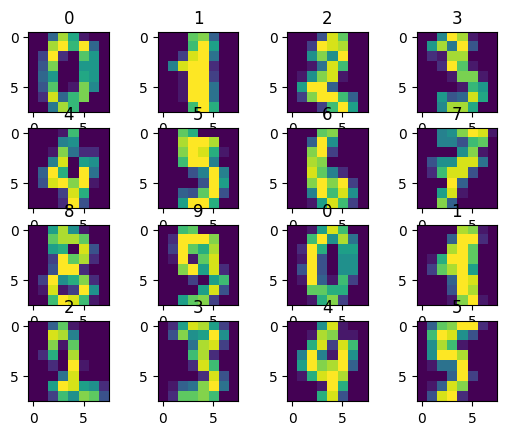

In [34]:
for i in range(4):
    for j in range(4):
        plt.subplot(4, 4, i * 4 + j + 1)
        plt.imshow(dataset.images[i * 4 + j])
        plt.title(dataset.target[i * 4 + j])


**Step 2**: Data Processing

2.1 Assign x and y variables
- x samples should be flattened as the MLP expects 1D input samples

2.2 Splitting the data into the train set with 1000 samples and 797 test samples


In [36]:
y = dataset.target
x = dataset.data.reshape(len(dataset.data), -1)
#The -1 is a special value in reshape that allows the library to automatically infer the correct number of columns based on the total number of elements and the specified row count. Essentially, it means "figure out this dimension for me."
print(x.shape)

(1797, 64)


In [41]:
#image has been flattened from 8x8 to 1D
x[0].shape

(64,)

In [43]:
trainset = x[:1000]
testset = x[1000:]

trainlabel = y[:1000]
testlabel = y[1000:]

**Step 3**: Defining the Neural network and Train

Using a multi-layer perceptron which uses logistic activation function and  stochastic gradient descent

In [46]:
mlp = MLPClassifier(hidden_layer_sizes=(15,),
                    activation='logistic', #activation for the hidden layers
                    alpha=1e-4, solver='sgd', # solver for weight optimization, uses stochastic gradient descent
                    tol=1e-4, random_state=1,
                    learning_rate_init=.1,
                    verbose=True)

mlp.fit(trainset, trainlabel)



Iteration 1, loss = 2.22958289
Iteration 2, loss = 1.91207743
Iteration 3, loss = 1.62507727
Iteration 4, loss = 1.32649842
Iteration 5, loss = 1.06100535
Iteration 6, loss = 0.83995513
Iteration 7, loss = 0.67806075
Iteration 8, loss = 0.55175832
Iteration 9, loss = 0.45840445
Iteration 10, loss = 0.39149735
Iteration 11, loss = 0.33676351
Iteration 12, loss = 0.29059880
Iteration 13, loss = 0.25437208
Iteration 14, loss = 0.22838372
Iteration 15, loss = 0.20200554
Iteration 16, loss = 0.18186565
Iteration 17, loss = 0.16461183
Iteration 18, loss = 0.14990228
Iteration 19, loss = 0.13892154
Iteration 20, loss = 0.12833784
Iteration 21, loss = 0.12138920
Iteration 22, loss = 0.11407971
Iteration 23, loss = 0.10677664
Iteration 24, loss = 0.10037149
Iteration 25, loss = 0.09593187
Iteration 26, loss = 0.09250135
Iteration 27, loss = 0.08676698
Iteration 28, loss = 0.08356043
Iteration 29, loss = 0.08209789
Iteration 30, loss = 0.07649168
Iteration 31, loss = 0.07410898
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(15,),
              learning_rate_init=0.1, random_state=1, solver='sgd',
              verbose=True)

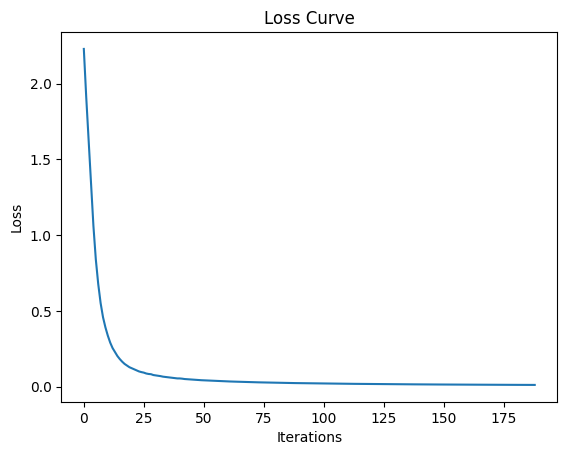

In [51]:
plt.subplots(1,1)
plt.plot(mlp.loss_curve_)
plt.title('Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()


**Step 4**: Model Evaluation

In [54]:
predictions = mlp.predict(testset)
print(predictions[:5])

[1 4 0 5 3]


In [56]:
accuracy_score(testlabel, predictions)

0.9146800501882058